<h1><div align = 'center'>Netflix Data Analysis</div></h1>
<h2></h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


<h3>Check for null Values.</h3>

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<h3>Drop 'director' and 'cast' column from the Dataset as it has Null values.</h3>

In [5]:
df.drop(['director','cast'], axis = 1, inplace = True)

In [6]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
df['country'].value_counts()

United States                           2032
India                                    777
United Kingdom                           348
Japan                                    176
Canada                                   141
                                        ... 
Finland, France                            1
United Kingdom, Egypt, United States       1
United States, France, Canada              1
Paraguay, Argentina                        1
United Kingdom, Belgium, Sweden            1
Name: country, Length: 554, dtype: int64

<h3>'country' column has some Null values we can replace them by 'United States', as 'United States' has the largest number of Movies and TV shows.</h3>

In [8]:
df['country'].replace(np.nan, 'United States', inplace = True)

In [9]:
df['date_added'].value_counts()

January 1, 2020       122
November 1, 2019       94
March 1, 2018          78
December 31, 2019      74
October 1, 2018        72
                     ... 
August 26, 2018         1
February 4, 2016        1
September 27, 2017      1
March 19, 2018          1
April 11, 2017          1
Name: date_added, Length: 1524, dtype: int64

<h3>Month is needed for Visualization, so let's separate the month from the 'date_added' column and replace the Null values with 0.</h3>

In [10]:
df['date_added'].replace(np.nan, 'null', inplace = True)
df['release_month'] = df['date_added'].apply (lambda x: x.strip().split()[0] )
df['release_month'].replace('null', 0, inplace = True)
df.drop(['date_added'], axis = 1, inplace = True)
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


In [11]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

<h3>Replace Null values with 'TV-MA' as they have the maximum count of rating.</h3>

In [12]:
df['rating'].replace(np.nan, 'TV-MA', inplace = True)
df.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

<h3>Removed all the Null values.</h3>

In [13]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


<h2>Data visualization</h2>

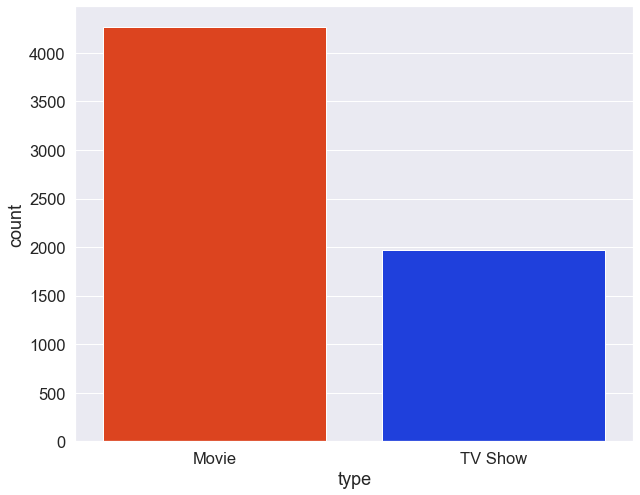

In [14]:
plt.figure(figsize = (10, 8))
sns.set_theme(font_scale = 1.5)
sns.countplot(data = df, x = 'type', palette=['#FB3100',"#002CFB"])
plt.show()

<h3>Netflix has around 4500 Movies and almost 2000 TV Shows.</h3>

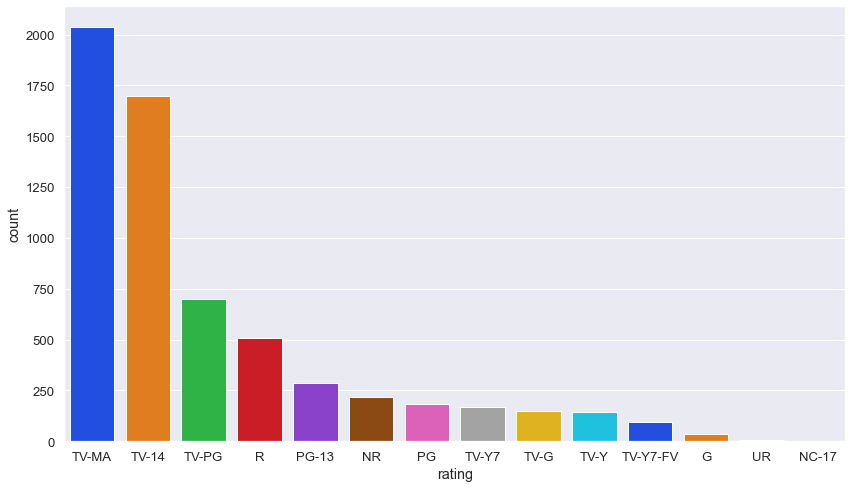

In [15]:
plt.figure(figsize = (14, 8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'rating', palette = 'bright', order = df['rating'].value_counts().index)
plt.show()

<h3>Most of the rating is given by 'TV-MA' then 'TV-14'.</h3>

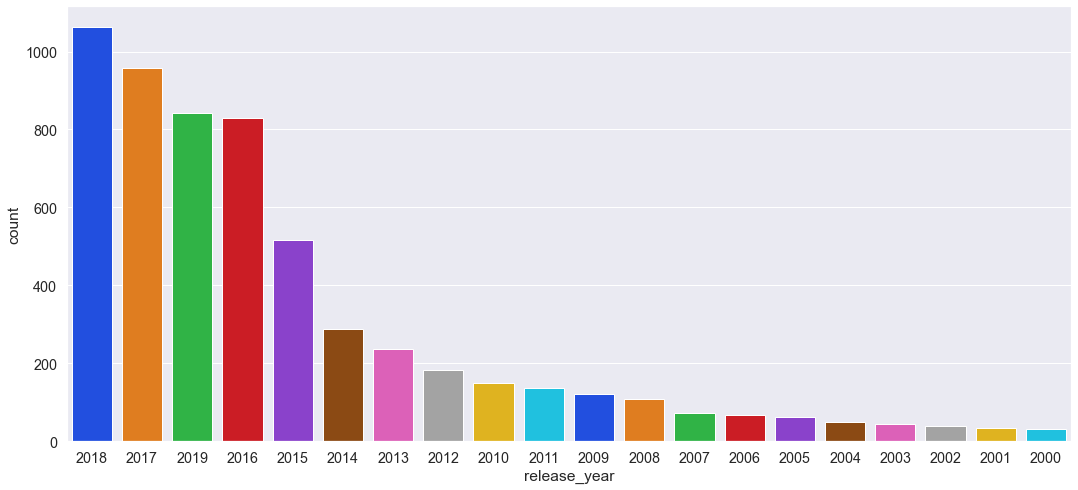

In [16]:
plt.figure(figsize = (18, 8))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, x = 'release_year', palette = 'bright', order = df['release_year'].value_counts().index[:20])
plt.show()

<h3>Highest number of Movies and Tv Shows are released in the Year '2018'.</h3>

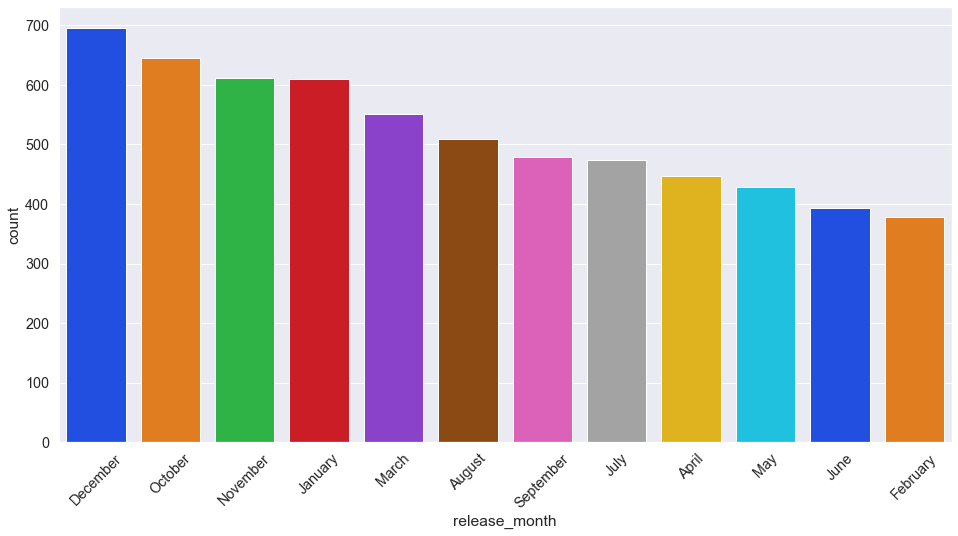

In [17]:
plt.figure(figsize = (16,8))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, x = 'release_month', palette = 'bright', order = df['release_month'].value_counts().index[:-1])
plt.xticks(rotation = 45)
plt.show()

<h3>Most of the directors prefer to release their Movies and TV Shows in 'December' and 'October'.</h3>

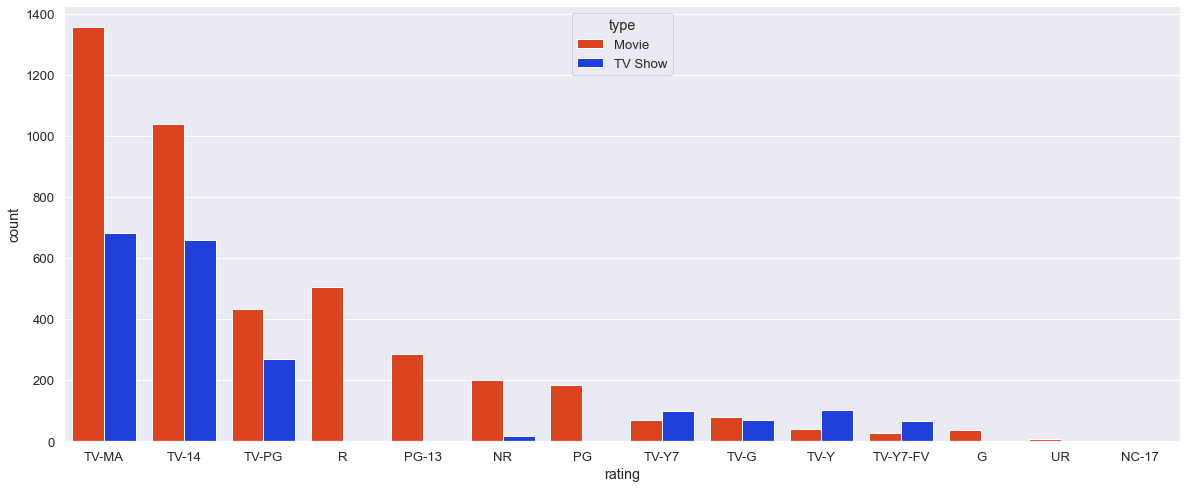

In [18]:
plt.figure(figsize = (20,8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'rating', hue = 'type', palette=['#FB3100',"#002CFB"], order = df['rating'].value_counts().index)
plt.show()

<h3> For Movies highest number of rating is given by 'TV-MA'<br>For TV Shows almost same number of rating is given by both 'TV-MA' and 'TV-14'.</h3>

<h3>Grouped Bar Chart</h3>

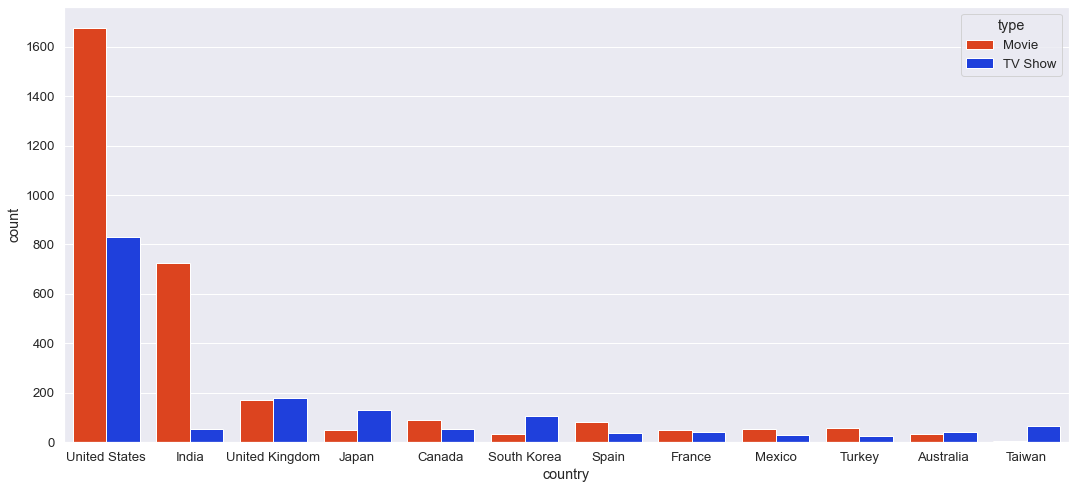

In [19]:
plt.figure(figsize = (18,8))
sns.set_theme(font_scale = 1.2)
sns.countplot(data = df, x = 'country', hue = 'type', palette=['#FB3100',"#002CFB"], order = df['country'].value_counts().index[: 12])
plt.show()

<h3>'United States' provides the highest number of Movies and TV Shows.<br>'India' provides the second highest number of Movies.</h3>

<h3>Pie Chart</h3>

In [20]:
top_10 = df['country'].value_counts()[: 10]
fig = px.pie(df, values = top_10, names = top_10.index, labels = top_10.index)
fig.update_traces(textposition = 'inside', textinfo ='percent + label')
fig.show()

<h3>'United States' provides the highest number of Movies and TV Shows.</h3>

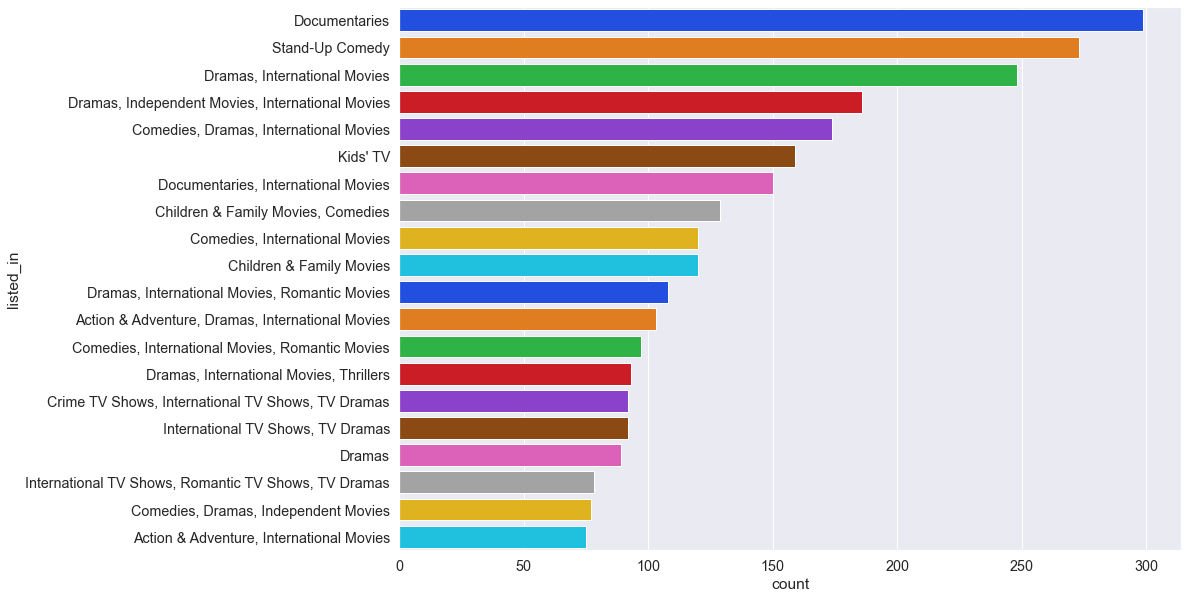

In [21]:
plt.figure(figsize = (14, 10))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = df, y = 'listed_in', palette = 'bright', order = df['listed_in'].value_counts().index[: 20])
plt.show()

<h3>The most Movies and TV Shows provided by Netflix are of 'Documentry' type.</h3>

<h3>List of Kid's TV Shows on Netflix.</h3>

In [22]:
kidShows = df[df['listed_in'] == 'Kids\' TV'].reset_index()
kidShows[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,Transformers Prime,TV Show,United States,"With the help of three human allies, the Autob...",1 Season,2013
1,Transformers: Robots in Disguise,TV Show,United States,When a prison ship crash unleashes hundreds of...,1 Season,2016
2,Ben 10,TV Show,United States,Ben can transform into ten types of aliens. He...,1 Season,2016
3,Hilda,TV Show,"United Kingdom, Canada, United States","Fearless, free-spirited Hilda finds new friend...",1 Season,2018
4,Kulipari: An Army of Frogs,TV Show,United States,"In a tale of bravery and heroism, fearless fro...",1 Season,2016
...,...,...,...,...,...,...
154,Wakfu,TV Show,France,"Yugo, a 12-year-old Eliatrope with special pow...",3 Seasons,2017
155,Spirit: Riding Free,TV Show,United States,"In a small Western town, spunky ex-city girl L...",8 Seasons,2019
156,The Magic School Bus Rides Again,TV Show,United States,Ms. Frizzle's kid sister Fiona takes the wheel...,2 Seasons,2018
157,Justin Time,TV Show,Canada,"In Justin's dreams, he and his imaginary frien...",2 Seasons,2012


<h3>List of Old Movies and TV Shows on Netflix.</h3>

In [23]:
Old = df.sort_values("release_year", ascending = True).reset_index()
Old[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,Pioneers: First Women Filmmakers*,TV Show,United States,This collection restores films from women who ...,1 Season,1925
1,Prelude to War,Movie,United States,Frank Capra's documentary chronicles the rise ...,52 min,1942
2,The Battle of Midway,Movie,United States,Director John Ford captures combat footage of ...,18 min,1942
3,Undercover: How to Operate Behind Enemy Lines,Movie,United States,This World War II-era training film dramatizes...,61 min,1943
4,Why We Fight: The Battle of Russia,Movie,United States,This installment of Frank Capra's acclaimed do...,82 min,1943
...,...,...,...,...,...,...
6229,Cheer,TV Show,United States,This gripping docuseries follows the ups and d...,1 Season,2020
6230,Bulletproof 2,Movie,United States,A special agent abruptly reunites with a crimi...,97 min,2020
6231,Maradona in Mexico,TV Show,"Argentina, United States, Mexico","In this docuseries, soccer great Diego Maradon...",1 Season,2020
6232,Killer Inside: The Mind of Aaron Hernandez,TV Show,United States,"Via interviews with friends, players and insid...",1 Season,2020


<h3>List of Indian Movies and TV Shows on Netflix.</h3>

In [24]:
In_Movie_TV = df[df['country'] == 'India'].reset_index()
In_Movie_TV[['title', 'type', 'description', 'duration', 'release_year']]

,title,type,description,duration,release_year
0,Article 15,Movie,The grim realities of caste discrimination com...,125 min,2019
1,Ee Nagaraniki Emaindi,Movie,"In Goa and in desperate need of cash, four chi...",133 min,2018
2,PK,Movie,Aamir Khan teams with director Rajkumar Hirani...,146 min,2014
3,Watchman,Movie,"Rushing to pay off a loan shark, a young man b...",93 min,2019
4,Bard of Blood,TV Show,"Years after a disastrous job in Balochistan, a...",1 Season,2019
...,...,...,...,...,...
772,The Human Factor: The Untold Story of the Bomb...,Movie,A family of Parsi musicians collectively works...,53 min,2013
773,Little Things,TV Show,A cohabiting couple in their 20s navigate the ...,3 Seasons,2019
774,The House That Made Me,TV Show,"With host Vinay Pathak, Indian celebrities ret...",3 Seasons,2015
775,Sab Jholmaal Hai,TV Show,"In this madcap comedy, two mischievous cats, a...",4 Seasons,2017


<h3>List of Movies and TV Shows released in 2018.</h3>

In [25]:
Movie_TV = df[df['release_year'] == 2018].reset_index()
Movie_TV[['title', 'type', 'country', 'description', 'duration', 'release_year']]

,title,type,country,description,duration,release_year
0,City of Joy,Movie,"United States,",Women who've been sexually brutalized in war-t...,77 min,2018
1,First and Last,TV Show,United States,Take an intimate look at the emotionally charg...,1 Season,2018
2,Next Gen,Movie,"China, Canada, United States",When lonely Mai forms an unlikely bond with a ...,106 min,2018
3,Sierra Burgess Is A Loser,Movie,United States,A wrong-number text sparks a virtual romance b...,106 min,2018
4,The Most Assassinated Woman in the World,Movie,"Belgium, United Kingdom, United States","In 1930s Paris, an actress famous for her gory...",102 min,2018
...,...,...,...,...,...,...
1058,BAKI,TV Show,Japan,While martial arts champion Baki Hanma trains ...,2 Seasons,2018
1059,Ash vs. Evil Dead,TV Show,United States,"Thirty years later, Ash Williams – demon hunte...",3 Seasons,2018
1060,Señora Acero,TV Show,"Mexico, United States","When her drug-trafficking husband dies, an una...",5 Seasons,2018
1061,The Magic School Bus Rides Again,TV Show,United States,Ms. Frizzle's kid sister Fiona takes the wheel...,2 Seasons,2018
